In [188]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import StratifiedKFold

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.utils.vis_utils import plot_model

df = pd.read_csv('creditcard.csv') # načítanie .csv súboru do dataframe-u pomocou knižnice pandas  
df.head() # vypísanie riadkov z dataframe-u (defaultne 5).

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [189]:
df.describe() # Gerovanie a následné vypísanie popisných štatistík dataframe-u

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [190]:
df.isnull().sum().max() # počet "NULL" hodnot v našom dataframe

0

In [191]:
# Náš dataset je velmi nevyrovnaný. Drtivá väčšina transakcií nie je podvod. Algoritmy strojového učenia majú problémy s učením, keď jedna trieda dominuje druhej.
# https://rikunert.com/SMOTE_explained
print('Nie podvod', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Podvod', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Nie podvod 99.83 % of the dataset
Podvod 0.17 % of the dataset


C:\Users\waste\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


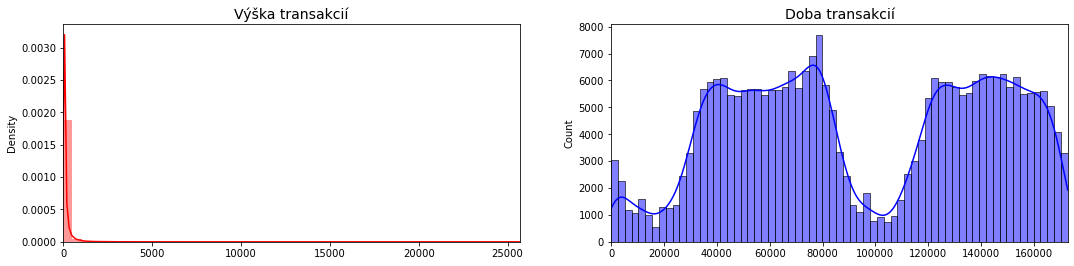

In [192]:
fig, ax = plt.subplots(1, 2, figsize=(18,4)) 

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, kde=True,ax=ax[0], color='r')
ax[0].set_title('Výška transakcií', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, kde=True, ax=ax[1], color='b')
ax[1].set_title('Doba transakcií', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show() # vykreslenie dvoch grafov. Prvý graf nám ukazuje počet a výšku transakcií. A druhý graf znázornuje kedy boli transakcie vykonávané. Kedže X-ová os ukazuje dobu od prvej transakcie. Prvý graf ukazuje že vačšina transakcií bola nižšej hodnoty ale nájde sa aj pár pomerne vysokých transakcií

In [193]:
# Kedže väčšinna dát už bola scale-ovaná len doba od prvej transakcie a velkosť transakcie nie, tak si vyškálujeme aj tieto dáta (Amount and Time)
from sklearn.preprocessing import RobustScaler

#použijeme RobustScaler
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1)) #vytvoríme dva nové stlpce v ktorých su už škálované hodnoty zo stlpcov (Amount, Time) 
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True) # Stlpce Amount a Time vymazeme z dataframu

In [194]:
scaled_amount = df['scaled_amount'] # Oba stlpce so škalovanými hodnotami zapíšeme do premenných
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)  #  Oba stlpce so škalovanými hodnotami vymažeme 
df.insert(0, 'scaled_amount', scaled_amount)                     #  a zapíšeme ich spať do datasetu na prvé dve pozicie (prvé dva stlpce)
df.insert(1, 'scaled_time', scaled_time)

# Všetky dáta su škálované.
# Vypíšeme si prvých 5 riadkov aby sme si overili že stlpce (scaled_amount , scaled_time) su na prvých dvoch miestach
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [195]:
from sklearn.model_selection import train_test_split # train split si tu nechávam pre testovanie ale vo finálnom subore pouzijeme Skf
from sklearn.model_selection import StratifiedKFold

#Pre učenie systému potrebujeme vstupné dáta - dataset. Ten následne rozdelíme
#na trénovaciu (original_train) a validačnú sadu (original_test). Učenie bude prebiehať iba na trénovacej sade. Úspešnosť
#systému potom vyhodnotíme na validačnej sade. Kvoli zle balancovanemu datasetu som si vybral StratifiedKFold

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset') # Vypíšeme si počet faločných a nefalošných transakcií
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1) #Všetko okrem stlpca Class
y = df['Class']   #Len stlpec Class (0/1)

#cross validation
# n_split(K=5) je počet experimentov ktoré sa vykonaju 
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
print(skf.get_n_splits(X, y))   #Vráti počet deliacich iterácií v cross validácii

for train_index, test_index in skf.split(X, y):             # Cyklus validacie (Skf) kde dataset rozdeli na n_split častí pričom jedna časť sluzi na validaciu a zvyšok (n_split-1) 
    print("Train:", train_index, "Test:", test_index)       # na trénovanie siete. Všetko sa zopakuje (n_split krát) 
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]    
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# prerobenie na pole
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# výpočet na podieľ faločných a nefalosnych transakcii
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Velkosť trénovacej sady: ', train_counts_label)          # Velkosti trenovacej a validačnej sady
print('Velkosť validačnej sady: ', test_counts_label, '\n')

print('Podieľ nefalošných a falošných transakcií v trénovacej a validačnej sade: ')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
5
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Velkosť trénovacej sady:  [227452    394]
Velkosť validačnej sady:  [56863    98] 

Podieľ nefalošných a falošných transakcií v trénovacej a validačnej sade: 
[0.99827076 0.00172924]
[0.99827952 0.00172048]


Velkosť trénovacej sady po oversampling-u:  [227452 227452]
Velkosť validačnej sady:  [56863    98] 

Podieľ nefalošných a falošných transakcií v trénovacej po oversampling-u: 
[0.5 0.5]


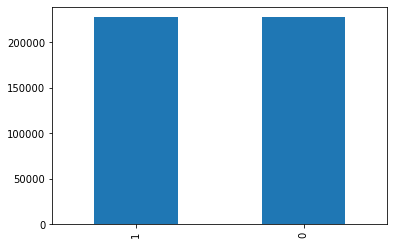

In [196]:
from imblearn.over_sampling import SMOTE  # Tu použijeme SMOTE na oversampling

oversample = SMOTE()
X_train_oversampled, y_train_oversampled = oversample.fit_resample(original_Xtrain, original_ytrain.ravel())
pd.Series(y_train_oversampled).value_counts().plot.bar() # vykreslíme si graf kde vidíme že trenovacia sada je vyrovnana priblizne na 50%/50%

train_unique_label_oversample, train_counts_label_oversample = np.unique(y_train_oversampled, return_counts=True) 

#Velkosť trénovacej sady po oversampling-u 
print('Velkosť trénovacej sady po oversampling-u: ', train_counts_label_oversample)
print('Velkosť validačnej sady: ', test_counts_label, '\n')

print('Podieľ nefalošných a falošných transakcií v trénovacej po oversampling-u: ') # teraz je pomer 50 na 50
print(train_counts_label_oversample/ len( y_train_oversampled))


In [197]:
# Vytvorenie NN
n_inputs = X_train_oversampled.shape[1]
 
oversample_model = Sequential([  # Použijeme sekvenčný model 
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'), # na prvej vrstve je input_shape
    Dense(32, activation='relu'),
    Dense(2, activation='sigmoid') # výstupná vrtsva je 1 dimenzia. Výstupom je číslo v intervale <0,1>
])

oversample_model.summary() 
print(len(oversample_model.weights)) 

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_34 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 66        
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________
6


In [198]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

In [199]:
history = oversample_model.fit(X_train_oversampled, y_train_oversampled, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
1214/1214 - 2s - loss: 0.0621 - accuracy: 0.9767 - val_loss: 0.0203 - val_accuracy: 0.9974
Epoch 2/20
1214/1214 - 1s - loss: 0.0131 - accuracy: 0.9971 - val_loss: 0.0081 - val_accuracy: 0.9997
Epoch 3/20
1214/1214 - 1s - loss: 0.0074 - accuracy: 0.9984 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 4/20
1214/1214 - 1s - loss: 0.0053 - accuracy: 0.9989 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 5/20
1214/1214 - 1s - loss: 0.0044 - accuracy: 0.9992 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 6/20
1214/1214 - 1s - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 7/20
1214/1214 - 1s - loss: 0.0028 - accuracy: 0.9994 - val_loss: 5.5421e-04 - val_accuracy: 1.0000
Epoch 8/20
1214/1214 - 1s - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0093 - val_accuracy: 0.9975
Epoch 9/20
1214/1214 - 1s - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 10/20
1214/1214 - 1s - loss: 0.0021 - accuracy: 0.9996 - val_loss: 8.342

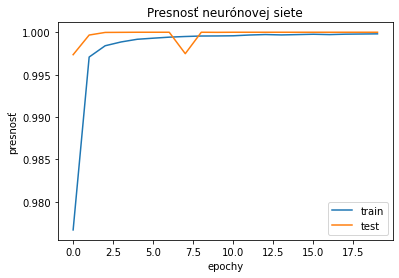

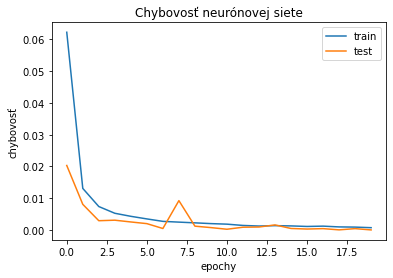

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [200]:
# vykreslenie dvoch grafov s presnosťou neuronovej siete a chybovostou

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) # validacne dáta
plt.title('Presnosť neurónovej siete')
plt.ylabel('presnosť')
plt.xlabel('epochy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) # validacne dáta
plt.title('Chybovosť neurónovej siete')
plt.ylabel('chybovosť')
plt.xlabel('epochy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# plot_model(oversample_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True) pridat graphviz

In [206]:
test_loss, test_acc = oversample_model.evaluate(original_Xtest, original_ytest, verbose = 0)
print("Chybovosť testovacej množniny: {}, Presnosť testovacej množniny: {}".format(round(test_loss, 5), round(test_acc, 5)))

Chybovosť testovacej množniny: 0.02988, Presnosť testovacej množniny: 0.9993


In [202]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0) 

In [203]:
oversample_fraud_predictions = oversample_model.predict_classes(original_Xtest, batch_size=200, verbose=0)

C:\Users\waste\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Text(0.5, 1.0, 'Confusion matrix')

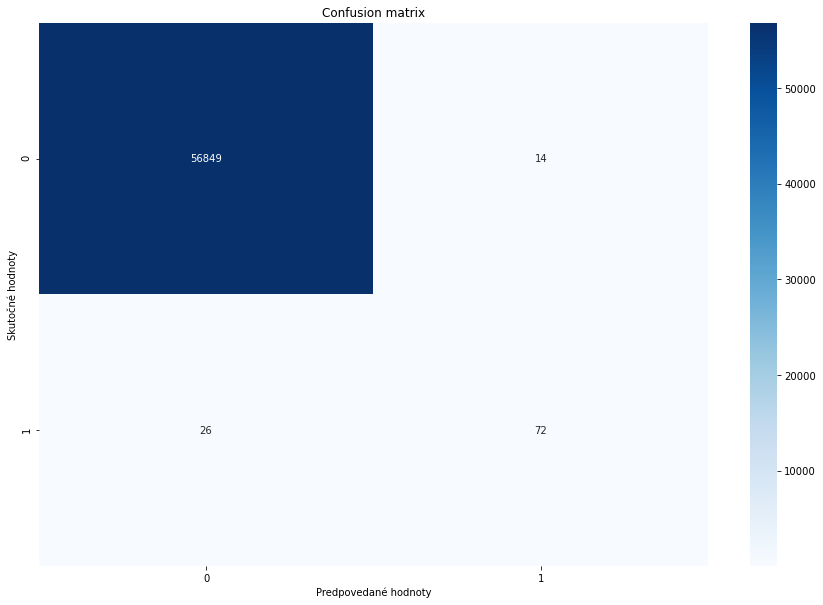

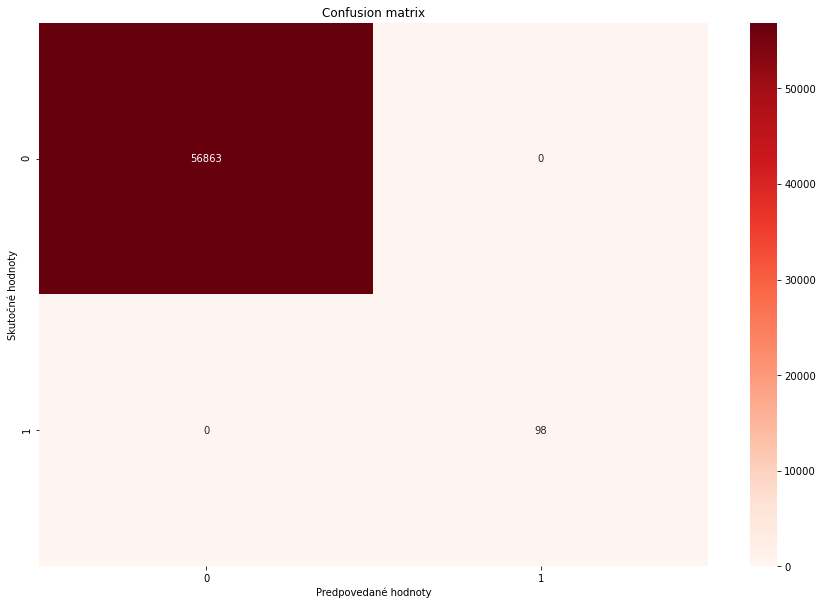

In [204]:
import itertools
from sklearn.metrics import confusion_matrix

# Vyzualizacia dat a porovnanie našej oversampled matice a matice so 100% presnostou   

oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
# dorobit labels = ['No Fraud', 'Fraud']

fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(oversample_smote, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predpovedané hodnoty')
ax.set_ylabel('Skutočné hodnoty')
ax.set_title('Confusion matrix')

fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(actual_cm, annot=True, fmt='d', ax=ax, cmap="Reds")
ax.set_xlabel('Predpovedané hodnoty')
ax.set_ylabel('Skutočné hodnoty')
ax.set_title('Confusion matrix')